# Erdos-Renyi random networks

In [1]:
import random

import networkx as nx
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_theme(style="ticks", context="notebook")

In [9]:
random.random()

0.6529223135709693

## Write a random graph generator

In [11]:
def random_graph(N, p):
    
    G = nx.Graph()
    nodes = range(N)
    G.add_nodes(N)
    
    for i in nodes:
        for j in nodes[:i]:
            if random.random <= p:
                G.add_edge((i, j))
                
    return G

In [12]:
def random_graph(N, p):

    G = nx.Graph()

    nodes = range(N)
    G.add_nodes_from(nodes)

    edges = []

    for i in nodes:
        for j in nodes[:i]:
            if random.random() < p:
                edges.append([i, j])

    G.add_edges_from(edges)

    return G

Graph with 10 nodes and 3 edges


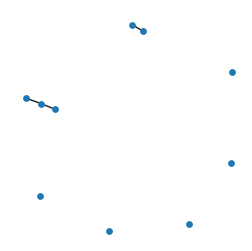

In [25]:
G = random_graph(N=10, p=0.1)
print(G)

fig, ax = plt.subplots(figsize=(3, 3))
nx.draw(G, node_size=15)

In [50]:
N = 100
p = 0.8 / N
G = random_graph(N, p)

In [51]:
np.log(N)

4.605170185988092

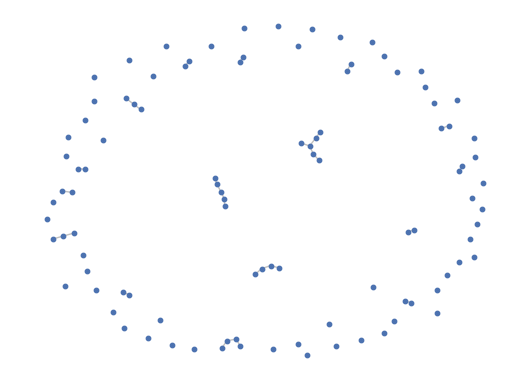

In [52]:
params = {
    "node_size": 10,
    "with_labels": False,
    "edge_color": "silver",
    "node_color": "b",
}

nx.draw_networkx(G, **params)

sb.despine(bottom=True, left=True)

plt.show()

## Analyse characteristics

In [75]:
N = 1000
p = 5 / N

G = nx.erdos_renyi_graph(N, p, seed=1)

/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_7931/3661388696.py:21: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(


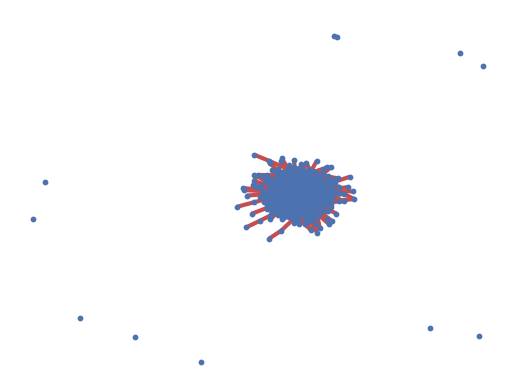

In [76]:
params = {
    "node_size": 10,
    "with_labels": False,
    "edge_color": "silver",
    "node_color": "b",
}

pos = nx.spring_layout(G)

nx.draw_networkx(G, pos=pos, **params)

# identify largest connected component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
# highlight largest connected component
nx.draw_networkx_edges(G0, pos=pos, width=3.0, edge_color="r")

# draw other connected components
for Gi in Gcc[1:]:
    if len(Gi) > 1:
        nx.draw_networkx_edges(
            G.subgraph(Gi), pos, alpha=0.4, width=3.0, edge_color="r"
        )


sb.despine(bottom=True, left=True)

In [77]:
print(f"Connected: {nx.is_connected(G)}")
print(f"# connected components: {len(list(nx.connected_components(G)))}")

print()
print(f"Size of largest connected component: {len(G0)}")
print(f"Prop. of nodes in it: {len(G0) / N:.2f}")

print()
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
print(f"Average degree: {np.average(degree_sequence)}")
print(f"Clustering coefficient: {nx.average_clustering(G)}")

Connected: False
# connected components: 11

Size of largest connected component: 989
Prop. of nodes in it: 0.99

Average degree: 5.0
Clustering coefficient: 0.005966788766788765


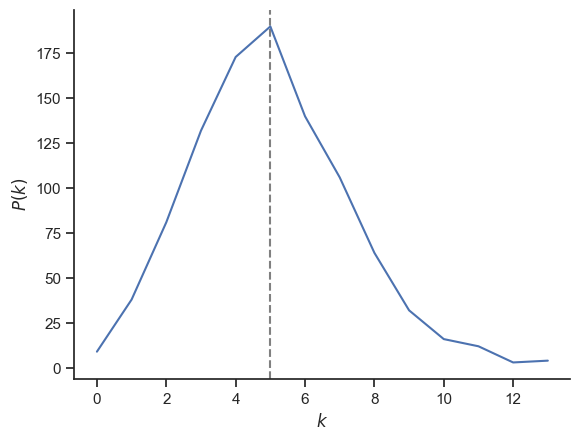

In [79]:
deg, counts = np.unique(degree_sequence, return_counts=True)

fig, ax = plt.subplots()

ax.plot(deg, counts)

ax.axvline(np.average(degree_sequence), ls="--", c="grey", zorder=-1)

ax.set_xlabel("$k$")
ax.set_ylabel("$P(k)$")
#plt.yscale("log")
#plt.xscale("log")

sb.despine()

## Vary the degree k 

In [ ]:
N = 1000

ks = np.

In [92]:
N = 1000

ks = np.arange(0, 5.1, 0.1)

ps = ks / (N - 1)

n_reps = 10

props_arr = np.zeros((len(ps), n_reps))

for i, p in enumerate(ps):
    for rep in range(n_reps):
        G = nx.erdos_renyi_graph(N, p)

        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        G0 = G.subgraph(Gcc[0])

        prop = len(G0) / N
        props_arr[i, rep] = prop

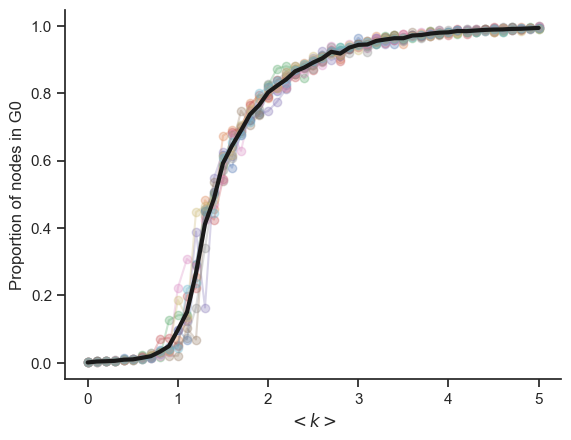

In [93]:
fig, ax = plt.subplots()

ax.plot(ks, props_arr[:, :], "-o", alpha=0.3)

ax.plot(ks, np.average(props_arr, axis=1), "k-", lw=3)

ax.set_ylabel("Proportion of nodes in G0")
ax.set_xlabel(r"$< k >$")

sb.despine()

## Configuration model

In [149]:
N = 20
p = 6 / N
G = random_graph(N, p)



In [150]:
degree_sequence = [d for n, d in G.degree()]

In [151]:
degree_sequence

[7, 4, 4, 7, 1, 4, 5, 2, 6, 5, 9, 7, 9, 3, 5, 5, 6, 5, 5, 3]

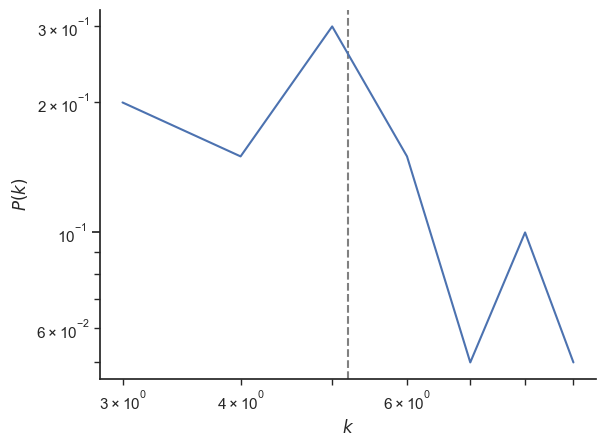

In [98]:
deg, counts = np.unique(degree_sequence, return_counts=True)

fig, ax = plt.subplots()
ax.plot(deg, counts / N)
ax.axvline(np.average(degree_sequence), ls="--", c="grey", zorder=-1)

ax.set_xlabel("$k$")
ax.set_ylabel("$P(k)$")
plt.yscale("log")
plt.xscale("log")

sb.despine()

In [170]:
G_conf = nx.configuration_model(degree_sequence)


In [171]:
print(G_conf)

MultiGraph with 20 nodes and 51 edges


In [172]:
G_conf = nx.Graph(G_conf)
print(G_conf)

Graph with 20 nodes and 48 edges


In [187]:

degree_sequence_conf = [d for n, d in G_conf.degree()]

In [174]:
print(G)

Graph with 20 nodes and 51 edges


In [175]:
print(G_conf)

Graph with 20 nodes and 48 edges


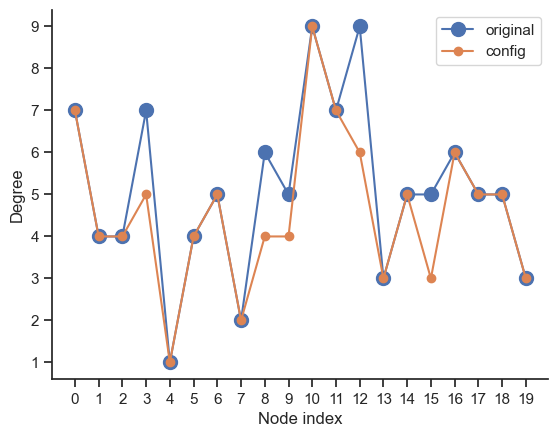

In [188]:
deg_conf, counts_conf = np.unique(degree_sequence_conf, return_counts=True)

fig, ax = plt.subplots()
ax.plot(degree_sequence, "o-", ms=10, label="original")
ax.plot(degree_sequence_conf, "o-", label="config")

ax.set_xlabel("Node index")
ax.set_ylabel("Degree")
# plt.yscale("log")
# plt.xscale("log")

ax.set_xticks(range(len(G)))

ax.legend()

sb.despine()

In [177]:
print(G)
print(G_conf)

Graph with 20 nodes and 51 edges
Graph with 20 nodes and 48 edges


In [178]:
pos = nx.spring_layout(G)

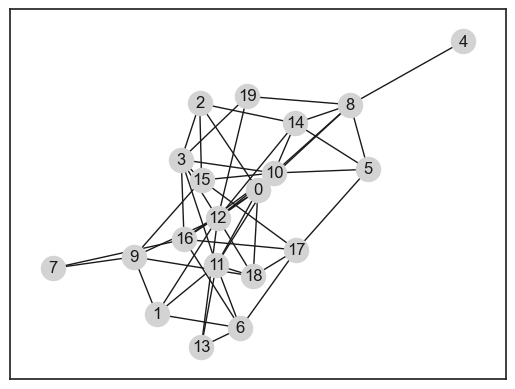

In [179]:
pos = nx.spring_layout(G, seed=1)
nx.draw_networkx(G, pos=pos, node_color="lightgrey")

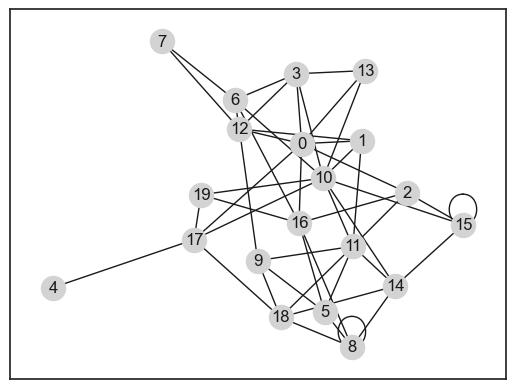

In [180]:
nx.draw_networkx(G_conf, node_color="lightgrey")

In [181]:
list(nx.selfloop_edges(G_conf))

[(8, 8), (15, 15)]

In [182]:
print(G_conf)

Graph with 20 nodes and 48 edges


In [183]:
edges_to_remove = list(nx.selfloop_edges(G_conf))
edges_to_remove

[(8, 8), (15, 15)]

In [184]:
G_conf.remove_edges_from(edges_to_remove)

In [185]:
print(G_conf)

Graph with 20 nodes and 46 edges


In [165]:
edges_to_remove

[(12, 12)]

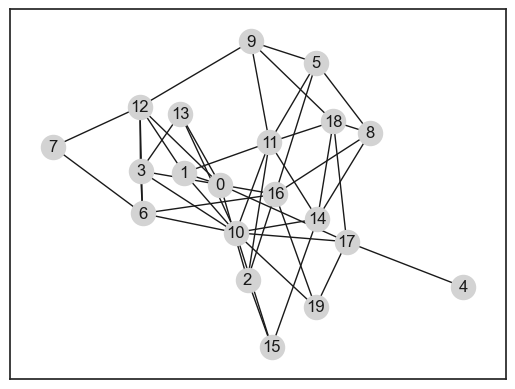

In [186]:
nx.draw_networkx(G_conf, node_color="lightgrey")